In [7]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy
from datetime import datetime

In [8]:
data = pd.read_excel("AMC3_Gruppe_23_WS25.xlsx",sheet_name=None)
CMC = data["CMC"]
auheizen = data["Aufheizen"]
reaktionsverlauf = data["Reaktion"]

# Berechnen der kritischen Mizellenkonzentration

"Es wurde eine CMC von 2.426 g\cdot L bestimmmt.
Vom Literaturwert weicht dieser um 1.075 % ab


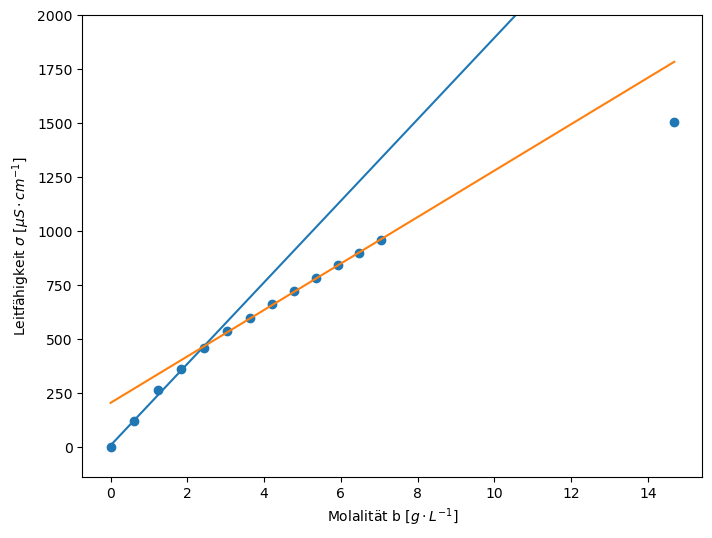

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

# TODO: Hier checken was die actual eingewogenen werte waren
m_SDS = 3.039 #g
V_SDS = 27e-3 # L
b_SDS = m_SDS/V_SDS # g.L^-1


V_SDS_zugegeben = np.concat([np.arange(0,13),[27]]) * 1e-3 

V_probe = 180e-3 + V_SDS_zugegeben # L
c_SDS = V_SDS_zugegeben*b_SDS / V_probe

CMC_lit = 2.4 # g.L^-1

leitfaehigkeit = np.delete(CMC["Value"],7) # Entferne Doppelten Messwert
plt.scatter(c_SDS,leitfaehigkeit)

ausgleich1 = scipy.stats.linregress(c_SDS[:5],leitfaehigkeit[:5])
ausgleich2 = scipy.stats.linregress(c_SDS[4:-1],leitfaehigkeit[4:-1])
ax.plot(c_SDS, ausgleich1.slope * c_SDS + ausgleich1.intercept)
ax.plot(c_SDS, ausgleich2.slope * c_SDS + ausgleich2.intercept)
ax.set_ylim(top=2000)
ax.set_xlabel("Molalität b [$g\cdot L^{-1}$]")
ax.set_ylabel("Leitfähigkeit $\sigma$ [$\mu S\cdot cm^{-1}$]")

def ausgleichs_schnitt(x):
    return (ausgleich1.slope * x + ausgleich1.intercept) - (ausgleich2.slope * x + ausgleich2.intercept)

CMC_gemessen = scipy.optimize.fsolve(ausgleichs_schnitt,2.4)[0]

print(f""""Es wurde eine CMC von {CMC_gemessen:.3f} g\cdot L bestimmmt.
Vom Literaturwert weicht dieser um {100*CMC_gemessen/CMC_lit-100:.3f} % ab""")


# Erstellen eines p-t-Diagrams

In [10]:
dichte_MMA = 0.94 # g/mL
cp_MMA = 1.5 # J/(g⋅K)
cp_wasser = 4.18 # J/(g⋅K)
M_MMA = 100.12 # g/mol

V_MMA = 27 # mL

auheizen

m_0 = V_MMA * dichte_MMA

#TODO: Daten einfügen


# Reaktionsverlauf

815.85
2235


array([    0.        ,    -3.50686288,    -7.01372576, ...,
       -1476.68396624, -1477.33002695, -1477.97608766], shape=(2235,))

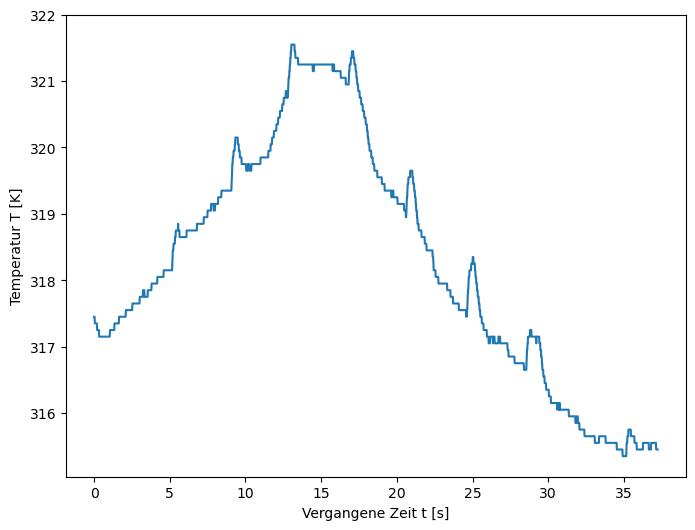

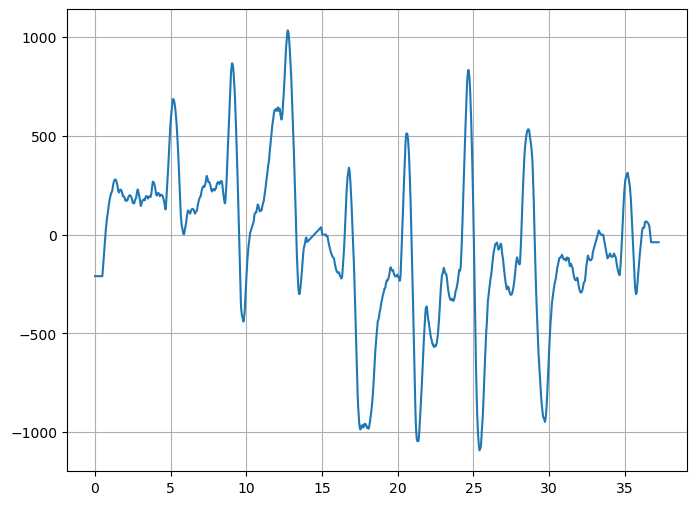

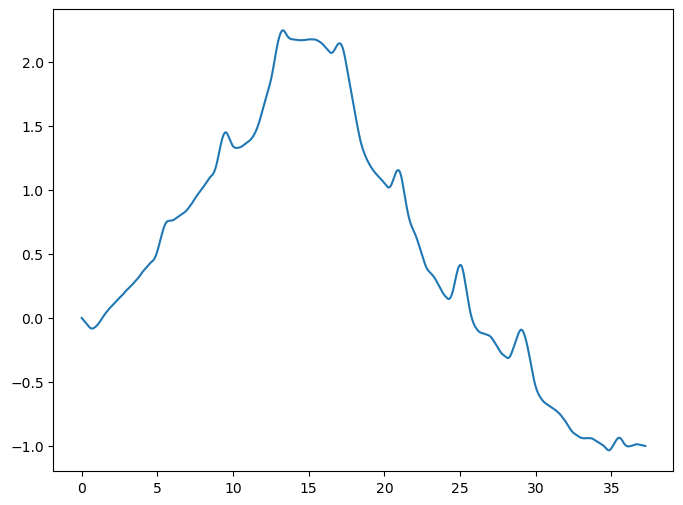

In [42]:
fig,ax = plt.subplots(figsize=(8,6))

T = np.array(reaktionsverlauf["Value2"]) + 273.15 # K

t = np.arange(0,len(reaktionsverlauf))

ax.plot(t/60,T)
reaktionsverlauf
ax.set_ylim(top=322)
ax.set_xlabel("Vergangene Zeit t [s]")
ax.set_ylabel("Temperatur T [K]")

t_min = t/60
dT = scipy.signal.savgol_filter(T,window_length=60,polyorder=1,deriv=1,delta=1/60)

m_wasser = 180
V_mma = 45
dichte_mma =.94
m_mma = V_mma*dichte_mma
cp_mma = 1.5 #J
cp_wasser = 4.18
cp = m_wasser * cp_wasser + cp_mma * m_mma
Q_chem = cp *dT

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(t_min,Q_chem)
ax.grid()
print(cp)
fig, ax = plt.subplots(figsize=(8,6))
print(len(Q_chem))

int_Q = np.concat([[0],scipy.integrate.cumulative_trapezoid(y=Q_chem,x=t_min)])
umsatz = -int_Q/int_Q[-1]
int_Q

ax.plot(t_min,umsatz)
int_Q